<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/User_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
data=pd.read_csv('/content/Salinan Online Retail Data (3).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411968 entries, 0 to 411967
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      411968 non-null  object 
 1   product_code  411967 non-null  object 
 2   product_name  409391 non-null  object 
 3   quantity      411967 non-null  float64
 4   order_date    411967 non-null  object 
 5   price         411967 non-null  float64
 6   customer_id   328323 non-null  float64
dtypes: float64(3), object(4)
memory usage: 22.0+ MB


In [ ]:
data_clean=data.copy()
#mengkonveris nilai menjadi datetime
data_clean['order_date']=pd.to_datetime(data_clean['order_date'])
data_clean['year_month']=data_clean['order_date'].dt.to_period('M')
data_clean=data_clean[~data_clean['customer_id'].isna()]
data_clean=data_clean[~data_clean['product_name'].isna()]
data_clean['product_name']=data_clean['product_name'].str.lower()
data_clean=data_clean[(~data_clean['product_code'].str.lower().str.contains('test'))|
                      (~data_clean['product_name'].str.contains('test'))]


In [ ]:
data_clean['order_status']=np.where(data_clean['order_id'].str[:1]=='C','cancelled','delivered')
data_clean['quantity']=data_clean['quantity'].abs()
data_clean=data_clean[data_clean['price']>0]
data_clean['amount']=data_clean['quantity']*data_clean['price']
most_freq_product_name = data_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
data_clean = data_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
data_clean['product_name'] = data_clean['most_freq_product_name']
data_clean = data_clean.drop(columns='most_freq_product_name')
# mengkonversi customer_id menjadi string
data_clean['customer_id'] = data_clean['customer_id'].astype(str)
# menghapus outlier
from scipy import stats
data_clean = data_clean[(np.abs(stats.zscore(data_clean[['quantity','amount']]))<3).all(axis=1)]
data_clean = data_clean.reset_index(drop=True)
data_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month,order_status,amount
0,C493411,21539,red retrospot butter dish,1.0,2010-01-04 09:43:00,4.25,14590.0,2010-01,cancelled,4.25
1,493414,21844,red retrospot mug,36.0,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered,91.80
2,493414,21533,retro spot large milk jug,12.0,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered,51.00
3,493414,37508,new england ceramic cake server,2.0,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered,5.10
4,493414,35001G,hand open shape gold,2.0,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered,8.50
...,...,...,...,...,...,...,...,...,...,...
326107,535416,22082,ribbon reel stripes design,10.0,2010-11-26 11:40:00,1.65,14312.0,2010-11,delivered,16.50
326108,535416,22080,ribbon reel spots design,10.0,2010-11-26 11:40:00,1.65,14312.0,2010-11,delivered,16.50
326109,535416,22113,grey heart hot water bottle,4.0,2010-11-26 11:40:00,3.75,14312.0,2010-11,delivered,15.00
326110,535416,84881,blue wire spiral candle holder,2.0,2010-11-26 11:40:00,6.35,14312.0,2010-11,delivered,12.70


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326112 entries, 0 to 326111
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      326112 non-null  object        
 1   product_code  326112 non-null  object        
 2   product_name  326112 non-null  object        
 3   quantity      326112 non-null  float64       
 4   order_date    326112 non-null  datetime64[ns]
 5   price         326112 non-null  float64       
 6   customer_id   326112 non-null  object        
 7   year_month    326112 non-null  period[M]     
 8   order_status  326112 non-null  object        
 9   amount        326112 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5), period[M](1)
memory usage: 24.9+ MB


In [ ]:
data_user_monthly=data_clean.groupby(['customer_id','year_month'],as_index=False).agg(order_cnt=('order_id','nunique'))
data_user_monthly

,customer_id,year_month,order_cnt
0,12346.0,2010-01,1
1,12346.0,2010-03,1
2,12346.0,2010-06,2
3,12346.0,2010-10,1
4,12608.0,2010-10,1
...,...,...,...
11044,18286.0,2010-06,1
11045,18286.0,2010-08,1
11046,18287.0,2010-05,1
11047,18287.0,2010-09,2


In [ ]:
data_user_monthly['cohort']=data_user_monthly.groupby('customer_id')['year_month'].transform('min')
data_user_monthly

,customer_id,year_month,order_cnt,cohort
0,12346.0,2010-01,1,2010-01
1,12346.0,2010-03,1,2010-01
2,12346.0,2010-06,2,2010-01
3,12346.0,2010-10,1,2010-01
4,12608.0,2010-10,1,2010-10
...,...,...,...,...
11044,18286.0,2010-06,1,2010-06
11045,18286.0,2010-08,1,2010-06
11046,18287.0,2010-05,1,2010-05
11047,18287.0,2010-09,2,2010-05


In [ ]:
from operator import attrgetter

data_user_monthly['period_num'] = (data_user_monthly['year_month'] - data_user_monthly['cohort']).apply(attrgetter('n')) + 1
data_user_monthly

,customer_id,year_month,order_cnt,cohort,period_num
0,12346.0,2010-01,1,2010-01,1
1,12346.0,2010-03,1,2010-01,3
2,12346.0,2010-06,2,2010-01,6
3,12346.0,2010-10,1,2010-01,10
4,12608.0,2010-10,1,2010-10,1
...,...,...,...,...,...
11044,18286.0,2010-06,1,2010-06,1
11045,18286.0,2010-08,1,2010-06,3
11046,18287.0,2010-05,1,2010-05,1
11047,18287.0,2010-09,2,2010-05,5


In [ ]:
df_cohort_pivot = pd.pivot_table(data_user_monthly, index='cohort', columns='period_num', values='customer_id', aggfunc=pd.Series.nunique)
df_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,
2010-01,713.0,280.0,334.0,313.0,305.0,304.0,293.0,268.0,285.0,319.0,312.0
2010-02,461.0,154.0,128.0,161.0,152.0,121.0,119.0,159.0,153.0,155.0,NaN
2010-03,528.0,147.0,159.0,145.0,140.0,123.0,149.0,186.0,175.0,NaN,NaN
2010-04,326.0,82.0,75.0,63.0,69.0,79.0,98.0,92.0,NaN,NaN,NaN
2010-05,274.0,55.0,50.0,52.0,52.0,72.0,61.0,NaN,NaN,NaN,NaN
2010-06,266.0,53.0,56.0,60.0,65.0,71.0,NaN,NaN,NaN,NaN,NaN
2010-07,179.0,38.0,37.0,52.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,227.0,64.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size=df_cohort_pivot.iloc[:,0]
cohort_size

,1
cohort,
2010-01,713.0
2010-02,461.0
2010-03,528.0
2010-04,326.0
2010-05,274.0
2010-06,266.0
2010-07,179.0
2010-08,160.0
2010-09,227.0


In [ ]:
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)
df_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,
2010-01,1.0,0.392707,0.468443,0.438990,0.427770,0.426367,0.410940,0.375877,0.399719,0.447405,0.437588
2010-02,1.0,0.334056,0.277657,0.349241,0.329718,0.262473,0.258134,0.344902,0.331887,0.336226,NaN
2010-03,1.0,0.278409,0.301136,0.274621,0.265152,0.232955,0.282197,0.352273,0.331439,NaN,NaN
2010-04,1.0,0.251534,0.230061,0.193252,0.211656,0.242331,0.300613,0.282209,NaN,NaN,NaN
2010-05,1.0,0.200730,0.182482,0.189781,0.189781,0.262774,0.222628,NaN,NaN,NaN,NaN
2010-06,1.0,0.199248,0.210526,0.225564,0.244361,0.266917,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.212291,0.206704,0.290503,0.268156,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.287500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.281938,0.246696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


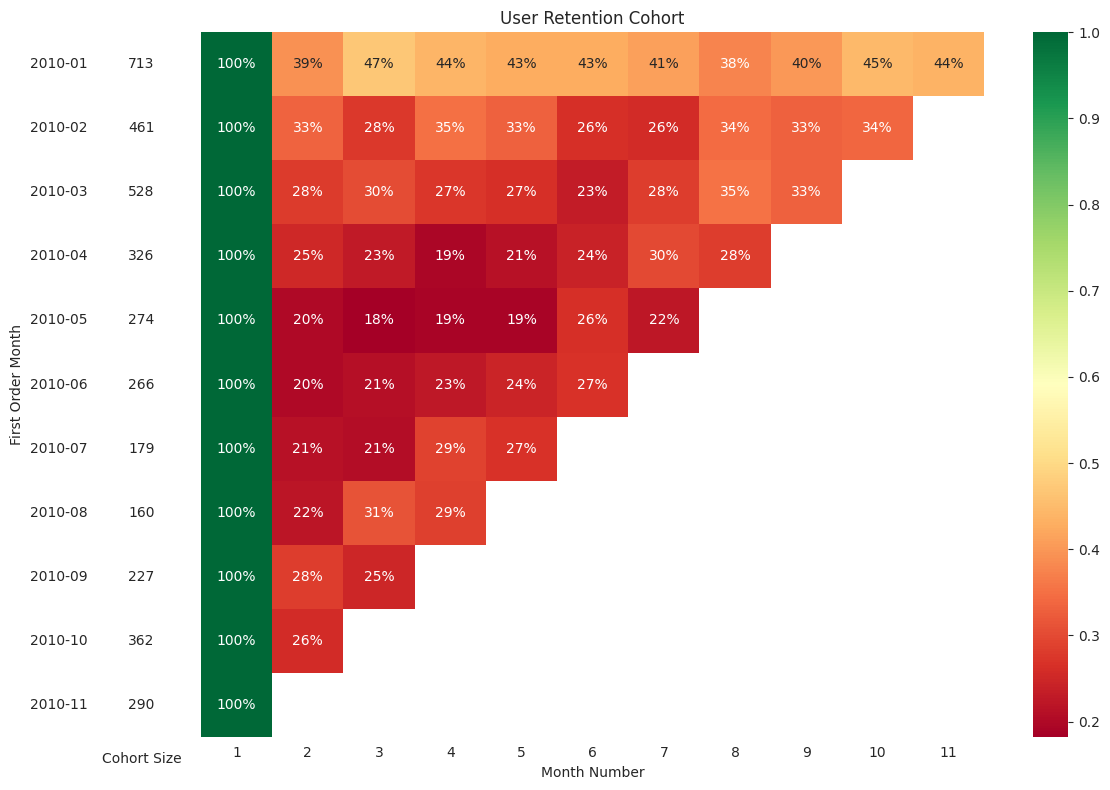

In [ ]:
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt
with sns.axes_style('white'):
  fig,ax=plt.subplots(1,2,figsize=(12,8),sharey=True,gridspec_kw={'width_ratios':[1,11]})
  sns.heatmap(df_retention_cohort,annot=True,fmt='.0%',cmap='RdYlGn',ax=ax[1])
  ax[1].set_title('User Retention Cohort')
  ax[1].set(xlabel='Month Number',ylabel='')
  df_cohort_size = pd.DataFrame(cohort_size)
  white_cmap = mcolors.ListedColormap(['white'])
  sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
  ax[0].tick_params(bottom=False)
  ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])
  fig.tight_layout()